<a href="https://colab.research.google.com/github/danushkhanna/iNeuron.ai-Phishing-Domain-Detection/blob/edit_1/ineuron_dataset_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/danushkhanna/iNeuron.ai-Phishing-Domain-Detection.git

Cloning into 'iNeuron.ai-Phishing-Domain-Detection'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), 2.72 MiB | 5.21 MiB/s, done.


In [2]:
 pip install pandas numpy seaborn matplotlib pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00

In [3]:
#IMPORTING ALL NECESSARY LIBRARIES & PACKAGES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pycaret.classification import *


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#IMPORTING THE DATASET AND SHOWING IT

df=pd.read_csv('/content/drive/MyDrive/ineuron/dataset_full.csv')
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [6]:
#SUMMARY STATISTICS OF THE DATASET

print(df.describe())

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

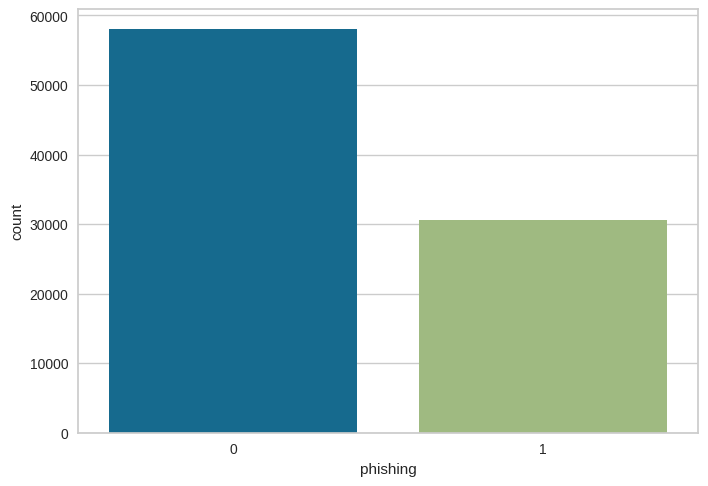

In [7]:
#VISUALIZING THE DISTRIBUTION OF THE DATASET

sns.countplot(x='phishing', data=df)
plt.show()

In [8]:
#CLEANING THE DATASET AND SHOWING IT

cols_to_drop=['qty_dot_directory', 
'qty_hyphen_directory', 
'qty_underline_directory', 
'qty_slash_directory', 
'qty_questionmark_directory', 
'qty_equal_directory', 
'qty_at_directory', 
'qty_and_directory', 
'qty_exclamation_directory', 
'qty_space_directory', 
'qty_tilde_directory', 
'qty_comma_directory', 
'qty_plus_directory', 
'qty_asterisk_directory', 
'qty_hashtag_directory', 
'qty_dollar_directory', 
'qty_percent_directory', 
'directory_length', 
'qty_dot_file', 
'qty_hyphen_file', 
'qty_underline_file', 
'qty_slash_file', 
'qty_questionmark_file', 
'qty_equal_file', 
'qty_at_file', 
'qty_and_file', 
'qty_exclamation_file', 
'qty_space_file', 
'qty_tilde_file', 
'qty_comma_file', 
'qty_plus_file', 
'qty_asterisk_file', 
'qty_hashtag_file', 
'qty_dollar_file', 
'qty_percent_file', 
'file_length', 
'qty_dot_params', 
'qty_hyphen_params', 
'qty_underline_params', 
'qty_slash_params', 
'qty_questionmark_params', 
'qty_equal_params', 
'qty_at_params', 
'qty_and_params', 
'qty_exclamation_params', 
'qty_space_params', 
'qty_tilde_params', 
'qty_comma_params', 
'qty_plus_params', 
'qty_asterisk_params', 
'qty_hashtag_params', 
'qty_dollar_params', 
'qty_percent_params', 
'params_length', 
'tld_present_params', 
'qty_params', 
]
df1=df.drop(cols_to_drop, axis=1)
df1.fillna(df1.mean(), inplace=True)
df1 = df1.astype(int)
df1

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [9]:
#PLOTTING A CORRELATION MATRIX TO IDENTIFY ANY STRONG CORRELATIONS

corr = df1.corr()
plt.figure(figsize=(100, 100))
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
#SUMMARY STATISTICS OF THE DATASET

print(df1.describe())

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

In [11]:
#SETTING UP THE DATA FOR MODELLING

setup(data=df1, target='phishing')

,Description,Value
0,Session id,4801
1,Target,phishing
2,Target type,Binary
3,Original data shape,"(88647, 56)"
4,Transformed data shape,"(88647, 56)"
5,Transformed train set shape,"(62052, 56)"
6,Transformed test set shape,"(26595, 56)"
7,Numeric features,55
8,Preprocess,True
9,Imputation type,simple


In [12]:
#COMPARING AND SELECTING THE BEST DATA

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9691,0.9942,0.9552,0.9553,0.9553,0.9316,0.9316,9.8650
rf,Random Forest Classifier,0.9689,0.9946,0.9552,0.9550,0.9551,0.9313,0.9313,7.9580
xgboost,Extreme Gradient Boosting,0.9684,0.9945,0.9536,0.9551,0.9543,0.9302,0.9302,17.9580
lightgbm,Light Gradient Boosting Machine,0.9642,0.9935,0.9484,0.9481,0.9482,0.9209,0.9209,1.5080
dt,Decision Tree Classifier,0.9503,0.9448,0.9267,0.9294,0.9280,0.8901,0.8901,0.7100
gbc,Gradient Boosting Classifier,0.9490,0.9879,0.9283,0.9246,0.9264,0.8874,0.8874,13.1790
ada,Ada Boost Classifier,0.9328,0.9829,0.9152,0.8932,0.9040,0.8523,0.8525,3.6930
lda,Linear Discriminant Analysis,0.9041,0.9717,0.7867,0.9247,0.8501,0.7803,0.7859,0.9180
ridge,Ridge Classifier,0.9028,0.0000,0.7817,0.9257,0.8476,0.7770,0.7830,0.4390
lr,Logistic Regression,0.8989,0.9562,0.7994,0.8967,0.8449,0.7703,0.7734,2.5320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [13]:
#TUNING THE HYPERPARAMETERS OF THE BEST PERFORMING MODEL

tuned_model = tune_model(best_model, n_iter=1, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6542,0.9296,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6542,0.9306,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6541,0.9305,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6543,0.9297,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6543,0.9295,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6543,0.9284,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6543,0.9303,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6543,0.9288,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6543,0.9263,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 21.9 MB/s eta 0:00:00


In [15]:
#MAKING PREDICTIONS ON NEW DATA

new_data = pd.read_csv('/content/drive/MyDrive/ineuron/dataset_full.csv')
predictions = predict_model(tuned_model, data=new_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9905,0.9994,0.9860,0.9865,0.9863,0.9790,0.9790


In [16]:
# PICKLE MODEL TO BE USED IN INTERFACE
pickle_file = open('/content/drive/MyDrive/ineuron/phishing_url_detector.pkl', 'wb')
pickle.dump(tuned_model, pickle_file)
pickle_file.close()